In [1]:
# import packages useful for inferential modeling
import os
import sys

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.diagnostic import linear_rainbow, het_breuschpagan
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.preprocessing import LabelEncoder

In [2]:
# add parent folder to path
sys.path.insert(0, '../')
import src.eda as eda

#### Load data files and create data frames:

In [3]:
df_parcel = eda.get_parcels()

Before EXTR_Parcel.csv:  (616089, 81)
After Filer EXTR_Parcel.csv:  (616089, 26)


In [6]:
# Real Property Sales
file = '../data/Real Property Sales/EXTR_RPSale.csv'
df_rps = pd.read_csv(file, encoding='iso-8859-1', low_memory = False)

FileNotFoundError: [Errno 2] File b'../data/Real Property Sales/EXTR_RPSale.csv' does not exist: b'../data/Real Property Sales/EXTR_RPSale.csv'

In [3]:
# Parcel
file = '../data/Parcel/EXTR_Parcel.csv'
df_parcel = pd.read_csv(file, encoding='iso-8859-1', low_memory = False)

In [4]:
print(f"Number of columns: {df_rps.shape[1]}\nNumber of entries: {df_rps.shape[0]}")

Number of columns: 24
Number of entries: 2107155


In [5]:
df_rps.columns

Index(['ExciseTaxNbr', 'Major', 'Minor', 'DocumentDate', 'SalePrice',
       'RecordingNbr', 'Volume', 'Page', 'PlatNbr', 'PlatType', 'PlatLot',
       'PlatBlock', 'SellerName', 'BuyerName', 'PropertyType', 'PrincipalUse',
       'SaleInstrument', 'AFForestLand', 'AFCurrentUseLand', 'AFNonProfitUse',
       'AFHistoricProperty', 'SaleReason', 'PropertyClass', 'SaleWarning'],
      dtype='object')

In [17]:
# filter 2019 data
df_rps['DocumentDate'] = pd.to_datetime(df_rps['DocumentDate'])
df_rps = df_rps[df_rps['DocumentDate'].dt.year == 2019 ]

KeyError: 'DocumentDate'

In [6]:
df_rps.head()

,ExciseTaxNbr,Major,Minor,DocumentDate,SalePrice,RecordingNbr,Volume,Page,PlatNbr,PlatType,...,PropertyType,PrincipalUse,SaleInstrument,AFForestLand,AFCurrentUseLand,AFNonProfitUse,AFHistoricProperty,SaleReason,PropertyClass,SaleWarning
0,2687551,138860,0110,08/21/2014,245000,20140828001436,,,,,...,3,6,3,N,N,N,N,1,8,
1,1235111,664885,0040,07/09/1991,0,199203161090,071,001,664885,C,...,3,0,26,N,N,N,N,18,3,11
2,2704079,423943,0050,10/11/2014,0,20141205000558,,,,,...,3,6,15,N,N,N,N,18,8,18 31 51
3,2584094,403700,0715,01/04/2013,0,20130110000910,,,,,...,3,6,15,N,N,N,N,11,8,18 31 38
4,3027422,213043,0120,12/20/2019,560000,20191226000848,,,,,...,3,6,3,N,N,N,N,1,8,


In [7]:
len(list(df_rps.columns))

24

In [8]:
# drop superfluous columns
keep_cols = ['Major', 'Minor', 'SalePrice', 'PropertyType', 'PrincipalUse']
df_rps = pd.DataFrame(df_rps, columns=keep_cols)
df_rps.head()

,Major,Minor,SalePrice,PropertyType,PrincipalUse
0,138860,0110,245000,3,6
1,664885,0040,0,3,0
2,423943,0050,0,3,6
3,403700,0715,0,3,6
4,213043,0120,560000,3,6


In [9]:
df_rps.isnull().any()

Major           False
Minor           False
SalePrice       False
PropertyType    False
PrincipalUse    False
dtype: bool

In [10]:
df_rps = df_rps[df_rps.SalePrice != 0]

In [11]:
df_rps.head()

,Major,Minor,SalePrice,PropertyType,PrincipalUse
0,138860,0110,245000,3,6
4,213043,0120,560000,3,6
5,951120,0900,85000,3,0
7,122209,9002,5755000,1,9
8,122209,9001,5755000,1,9


In [12]:
df_rps['Major_Minor'] = df_rps['Major'] + df_rps['Minor']

In [13]:
# view column correlations
corr = df_rps.corr()
corr

,SalePrice,PropertyType,PrincipalUse
SalePrice,1.000000,0.007002,0.089555
PropertyType,0.007002,1.000000,0.079750
PrincipalUse,0.089555,0.079750,1.000000


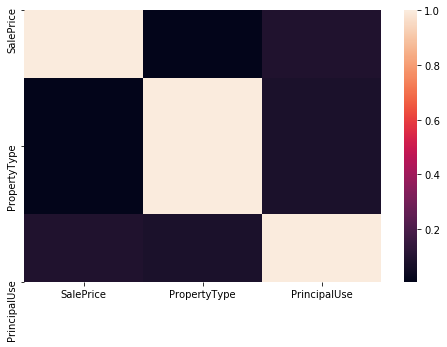

In [14]:
# Create heat map
# mask to remove duplicate rows from heatmap
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# plot
fig, ax = plt.subplots(figsize=(8,5))
sns.heatmap(corr, ax=ax)

#### Very low correlation between columns

In [18]:
sns.pairplot(df_rps[:1000])

Error in callback <function flush_figures at 0x0000020F6D456950> (for post_execute):


KeyboardInterrupt: 

In [19]:
fsm_df = df_rps[[""]].copy()

KeyError: "None of [Index([''], dtype='object')] are in the [columns]"